In [33]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

# these are for model persistence
import pickle
import joblib

In [34]:
# makes the plots interactive vs inline
%matplotlib notebook

# plt.style.available
plt.style.use('seaborn-white')

C:\Users\saada\AppData\Local\Temp\ipykernel_19140\23159879.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


In [35]:
# will use the separate data frames for now since Panel is being deprecated
# may not be as efficient though
data_frames = {}
stock_tickers = ['AAPL','META','GOOGL']

In [5]:
# importing the stock data into a Pandas DataFrame object(s)
# Use index_col when importing the CSVs to make that the index
def get_data(tickers):       
    for ticker in tickers:
        data_frames[ticker] = pd.read_csv(ticker+'.csv', index_col=0)
        
get_data(stock_tickers)

In [6]:
AAPL = data_frames['AAPL']
AAPL.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426559,70790800
2023-01-10,130.259995,131.259995,128.119995,130.729996,130.003342,63896200
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.748016,69458900
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.668442,71379600
2023-01-13,132.029999,134.919998,131.660004,134.759995,134.010941,57809700
2023-01-17,134.830002,137.289993,134.130005,135.940002,135.184387,63646600
2023-01-18,136.820007,138.610001,135.029999,135.210007,134.458450,69672800
2023-01-19,134.080002,136.250000,133.770004,135.270004,134.518127,58280400
2023-01-20,135.279999,138.020004,134.220001,137.869995,137.103653,80223600


In [7]:
AAPL.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,185.639999,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,184.250000,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.910004,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,181.179993,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,185.559998,59087900


In [8]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,173.193068,174.790956,171.938008,173.504861,173.089883,5.883899e+07
std,16.608415,16.336289,16.539447,16.336108,16.511069,1.724662e+07
min,130.259995,131.259995,128.119995,130.149994,129.426559,2.404830e+07
25%,162.750000,165.165001,161.955002,164.215004,163.551559,4.790395e+07
50%,176.380005,177.679993,174.800003,176.080002,175.848328,5.520920e+07
75%,186.989998,188.250000,185.119996,187.220001,186.952607,6.552400e+07
max,198.020004,199.619995,197.000000,198.110001,198.110001,1.543573e+08


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 251 entries, 2023-01-09 to 2024-01-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7+ KB


In [10]:
AAPL.index

Index(['2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
       '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-23',
       ...
       '2023-12-22', '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
       '2024-01-02', '2024-01-03', '2024-01-04', '2024-01-05', '2024-01-08'],
      dtype='object', name='Date', length=251)

In [11]:
def convert_index_to_datetimeindex(stock_data):
    
    for ticker in stock_data:         
        # converting the dates to DateTimeIndex
        df = data_frames[ticker]
        df.index = pd.to_datetime(df.index)
    
convert_index_to_datetimeindex(stock_tickers) 
data_frames['AAPL'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-09,130.470001,133.410004,129.889999,130.149994,129.426559,70790800
2023-01-10,130.259995,131.259995,128.119995,130.729996,130.003342,63896200
2023-01-11,131.250000,133.509995,130.460007,133.490005,132.748016,69458900
2023-01-12,133.880005,134.259995,131.440002,133.410004,132.668442,71379600
2023-01-13,132.029999,134.919998,131.660004,134.759995,134.010941,57809700


In [12]:
data_frames['AAPL'].index

DatetimeIndex(['2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12',
               '2023-01-13', '2023-01-17', '2023-01-18', '2023-01-19',
               '2023-01-20', '2023-01-23',
               ...
               '2023-12-22', '2023-12-26', '2023-12-27', '2023-12-28',
               '2023-12-29', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-08'],
              dtype='datetime64[ns]', name='Date', length=251, freq=None)

In [13]:
data_frames['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2023-01-09 to 2024-01-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       251 non-null    float64
 1   High       251 non-null    float64
 2   Low        251 non-null    float64
 3   Close      251 non-null    float64
 4   Adj Close  251 non-null    float64
 5   Volume     251 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 13.7 KB


In [14]:
# these are only useful when compared to other stocks.
def generate_daily_returns(df, ticker):
    #t/(t-1)]-1
    df['Daily Returns'] = (df['Adj Close']/df['Adj Close'].shift(1)) - 1

for ticker in stock_tickers:
    generate_daily_returns(data_frames[ticker], ticker)

In [15]:
def generate_interactions(df, ticker):
    df['Daily Returns x Volume'] = df['Daily Returns'] * df['Volume']
    df['Adj Close x Volume'] = df['Adj Close'] * df['Volume']
    df['Daily Returns x Adj Close'] = df['Daily Returns'] * df['Adj Close']
    df['Daily Returns x Volume x Adj Close'] = df['Daily Returns'] * df['Volume'] * df['Adj Close'] 
    
generate_interactions(data_frames['GOOGL'], 'GOOGL')

In [16]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def add_interactions(df):
    # Get feature names
    combos = list(combinations(list(df.columns), 2))
    colnames = list(df.columns) + ['_'.join(x) for x in combos]
    
    # Find interactions
    poly = PolynomialFeatures(interaction_only=True, include_bias=False)
    df = poly.fit_transform(df)
    df = pd.DataFrame(df)
    df.columns = colnames
    
    # Remove interaction terms with all 0 values            
    noint_indicies = [i for i, x in enumerate(list((df == 0).all())) if x]
    df = df.drop(df.columns[noint_indicies], axis=1)
    
    return df

In [17]:
X = add_interactions(data_frames['GOOGL'].dropna())
print(X.head(5))

        Open       High        Low      Close  Adj Close      Volume  \
0  85.980003  88.669998  85.830002  88.419998  88.419998  30467800.0   
1  89.180000  91.599998  89.010002  91.519997  91.519997  26862000.0   
2  91.480003  91.870003  89.750000  91.129997  91.129997  30258100.0   
3  90.849998  92.190002  90.129997  92.120003  92.120003  26329200.0   
4  92.059998  92.250000  90.050003  91.290001  91.290001  32602400.0   

   Daily Returns  Daily Returns x Volume  Adj Close x Volume  \
0       0.004544           138458.883017        2.693963e+09   
1       0.035060           941779.857742        2.458410e+09   
2      -0.004261          -128940.771272        2.757421e+09   
3       0.010864           286031.678188        2.425446e+09   
4      -0.009010          -293747.897564        2.976273e+09   

   Daily Returns x Adj Close  ...  Daily Returns_Daily Returns x Volume  \
0                   0.401819  ...                            629.217150   
1                   3.208685  ..

In [18]:
X.dropna().corr()

,Open,High,Low,Close,Adj Close,Volume,Daily Returns,Daily Returns x Volume,Adj Close x Volume,Daily Returns x Adj Close,...,Daily Returns_Daily Returns x Volume,Daily Returns_Adj Close x Volume,Daily Returns_Daily Returns x Adj Close,Daily Returns_Daily Returns x Volume x Adj Close,Daily Returns x Volume_Adj Close x Volume,Daily Returns x Volume_Daily Returns x Adj Close,Daily Returns x Volume_Daily Returns x Volume x Adj Close,Adj Close x Volume_Daily Returns x Adj Close,Adj Close x Volume_Daily Returns x Volume x Adj Close,Daily Returns x Adj Close_Daily Returns x Volume x Adj Close
Open,1.000000,0.997543,0.997893,0.994690,0.994690,-0.341763,-0.059953,-0.037491,-0.015967,-0.046502,...,-0.102483,-0.032409,-0.073616,-0.071143,-0.004121,-0.071143,-0.066724,-0.025311,-0.005199,-0.040810
High,0.997543,1.000000,0.998102,0.997890,0.997890,-0.328650,-0.017638,-0.005871,-0.000546,-0.003760,...,-0.096810,-0.000290,-0.061962,-0.065725,0.017797,-0.065725,-0.065662,0.006937,0.016909,-0.035713
Low,0.997893,0.998102,1.000000,0.998118,0.998118,-0.359522,-0.019898,-0.003323,-0.032721,-0.006244,...,-0.116091,0.001447,-0.083431,-0.083908,0.024691,-0.083908,-0.082142,0.007922,0.022592,-0.052695
Close,0.994690,0.997890,0.998118,1.000000,1.000000,-0.349346,0.017785,0.023605,-0.021789,0.031356,...,-0.109426,0.028554,-0.072632,-0.077844,0.041670,-0.077844,-0.079139,0.034826,0.039672,-0.047284
Adj Close,0.994690,0.997890,0.998118,1.000000,1.000000,-0.349346,0.017785,0.023605,-0.021789,0.031356,...,-0.109426,0.028554,-0.072632,-0.077844,0.041670,-0.077844,-0.079139,0.034826,0.039672,-0.047284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Daily Returns x Volume_Daily Returns x Adj Close,-0.071143,-0.065725,-0.083908,-0.077844,-0.077844,0.619839,-0.142717,-0.318377,0.637442,-0.146157,...,0.993361,-0.326162,0.972770,1.000000,-0.467902,1.000000,0.986260,-0.329520,-0.478927,0.994263
Daily Returns x Volume_Daily Returns x Volume x Adj Close,-0.066724,-0.065662,-0.082142,-0.079139,-0.079139,0.616538,-0.230318,-0.428961,0.622985,-0.229650,...,0.986598,-0.431960,0.924581,0.986260,-0.578638,0.986260,1.000000,-0.429548,-0.583669,0.974401
Adj Close x Volume_Daily Returns x Adj Close,-0.025311,0.006937,0.007922,0.034826,0.034826,-0.086033,0.907139,0.971842,-0.060741,0.914204,...,-0.326428,0.993101,-0.195809,-0.329520,0.931557,-0.329520,-0.429548,1.000000,0.951765,-0.328871
Adj Close x Volume_Daily Returns x Volume x Adj Close,-0.005199,0.016909,0.022592,0.039672,0.039672,-0.209194,0.767619,0.950717,-0.182536,0.762736,...,-0.480555,0.958080,-0.339854,-0.478927,0.992619,-0.478927,-0.583669,0.951765,1.000000,-0.472777


<IPython.core.display.Javascript object>


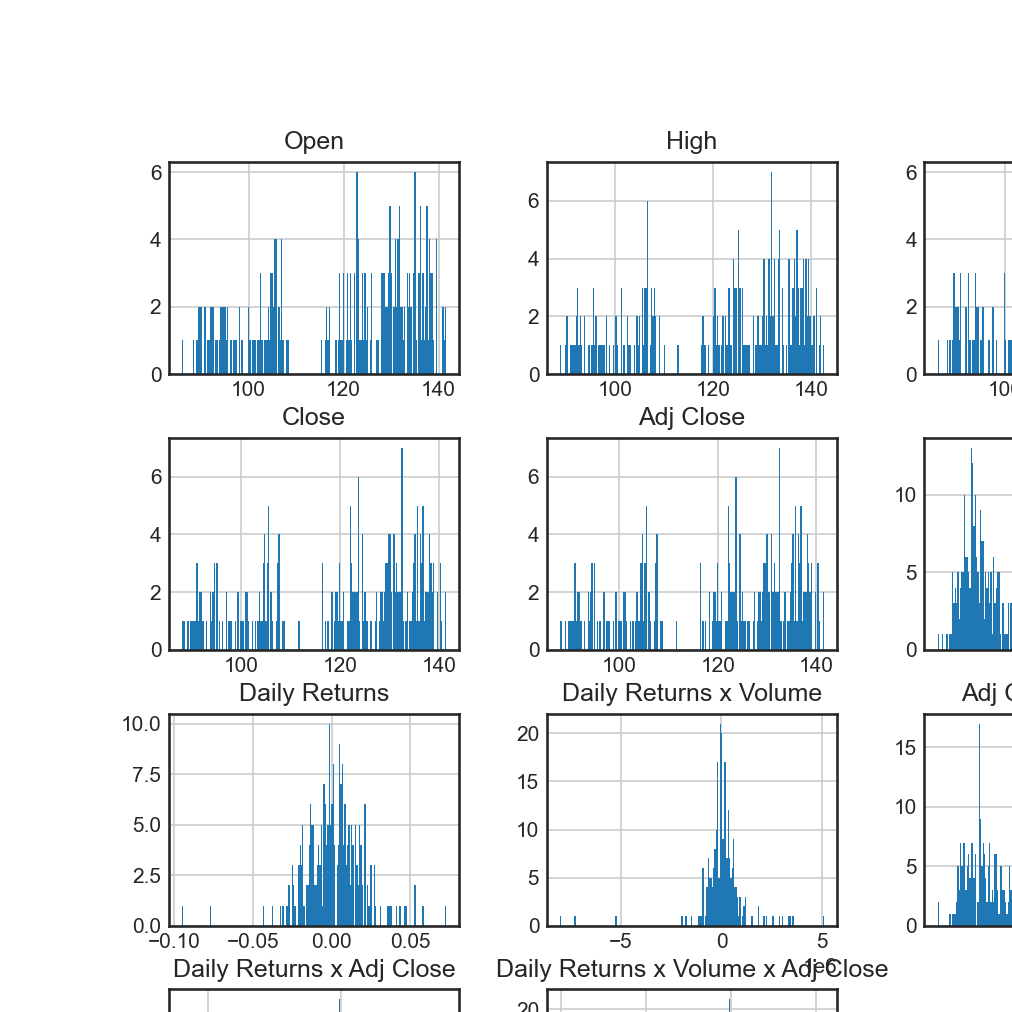

In [19]:
data_frames['GOOGL'].hist(bins=200, figsize=(9,9));

In [20]:
import sklearn.preprocessing as pre

scaler = pre.StandardScaler()
# this returns a numpy array not a dataframe
G = scaler.fit_transform(data_frames['GOOGL'].dropna())

<IPython.core.display.Javascript object>


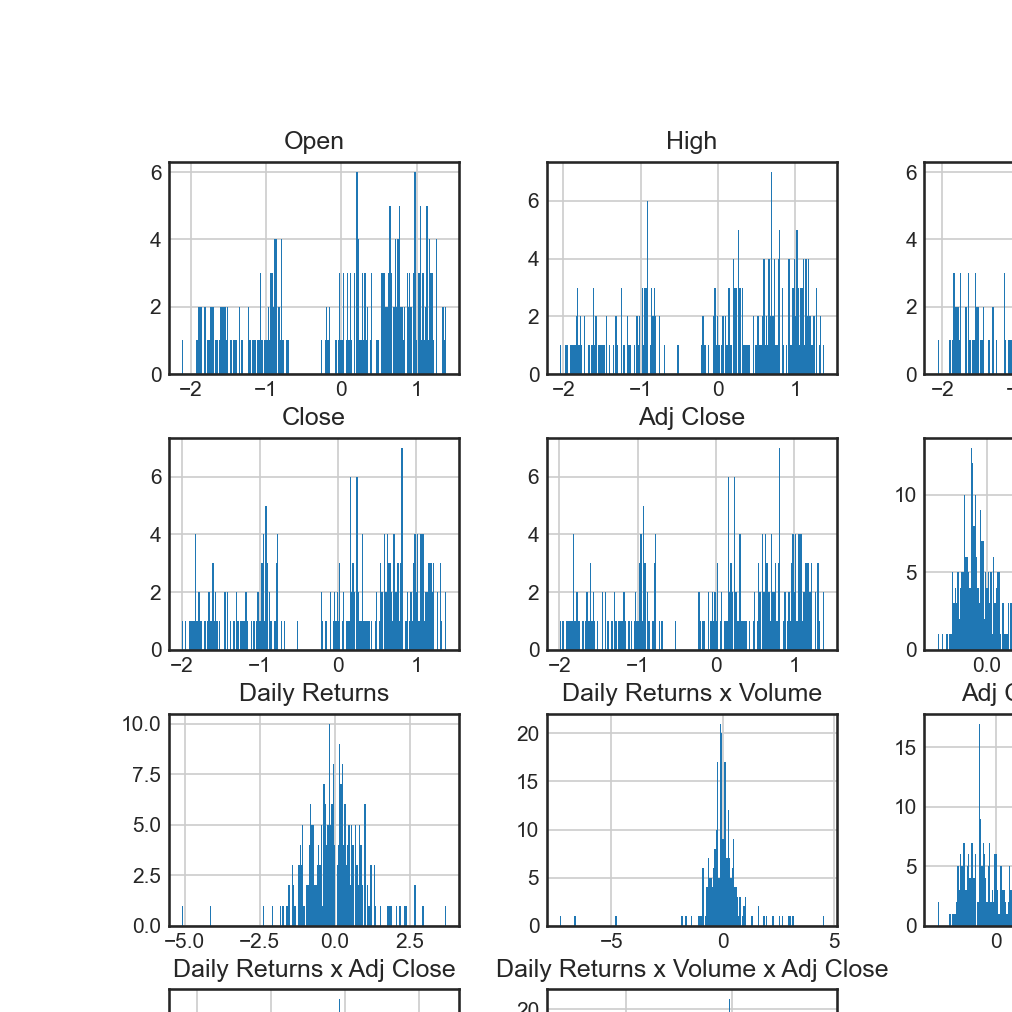

In [21]:
G = pd.DataFrame(G, index=data_frames['GOOGL'].dropna().index, columns=data_frames['GOOGL'].dropna().columns)
G.hist(bins=200, figsize=(9,9));

<IPython.core.display.Javascript object>


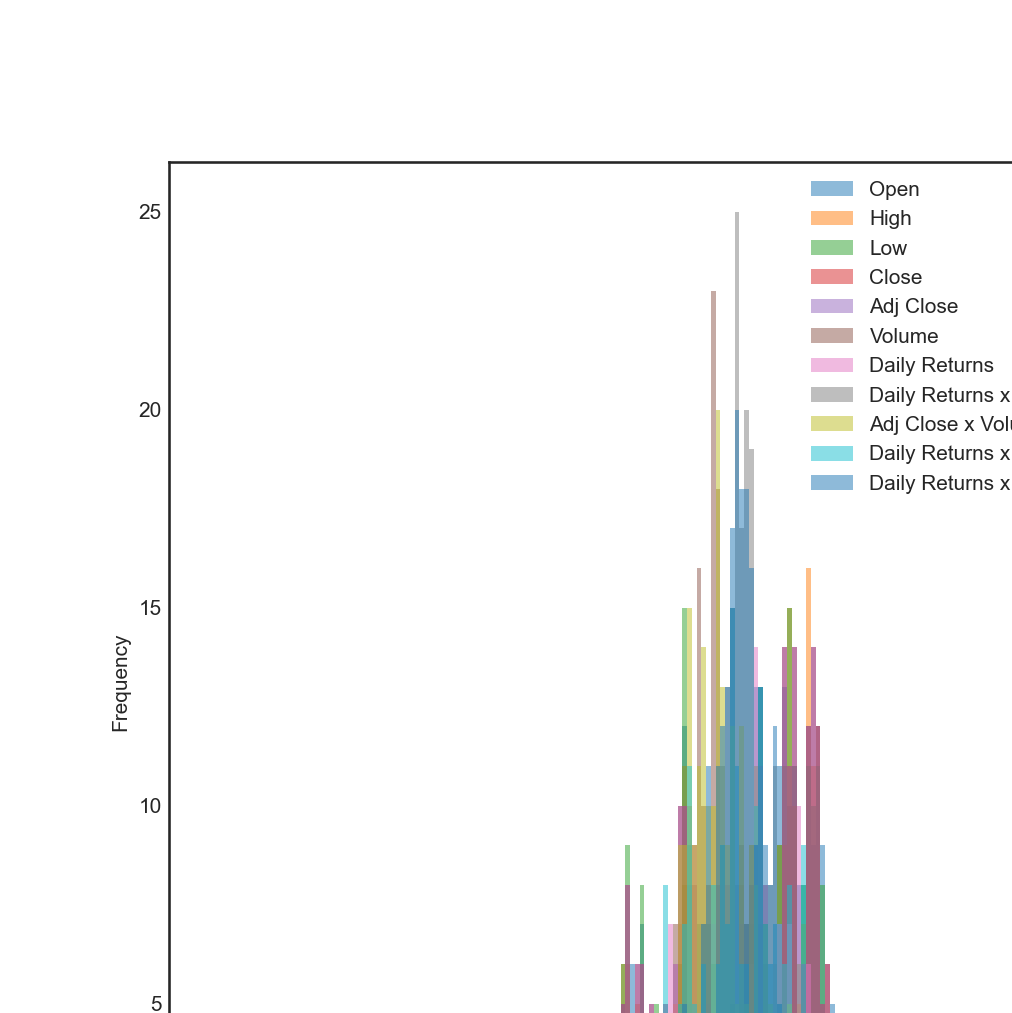

In [22]:
G.plot.hist(alpha=0.5, bins=200, figsize=(9,9));

<IPython.core.display.Javascript object>


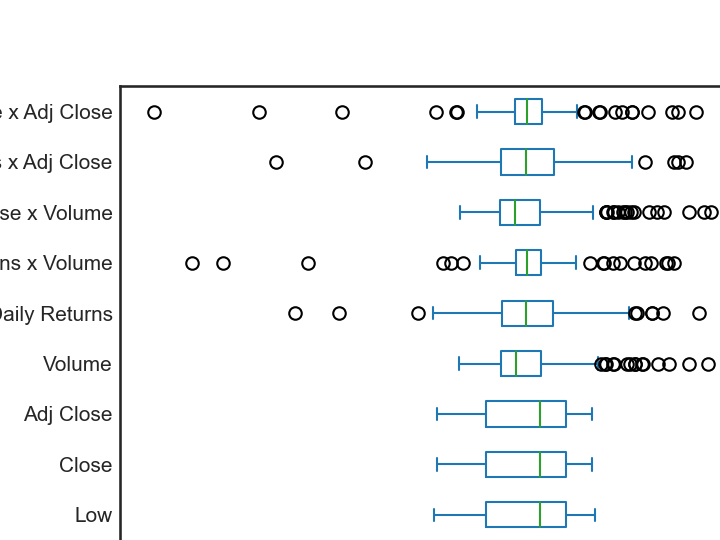

In [23]:
G.plot.box(vert=False);

<IPython.core.display.Javascript object>


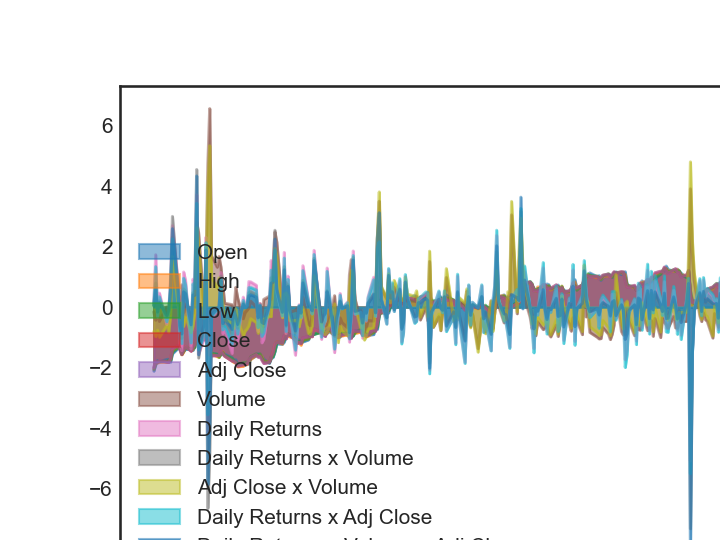

In [24]:
G.plot.area(stacked=False);

#### Scatter Matrix

<IPython.core.display.Javascript object>


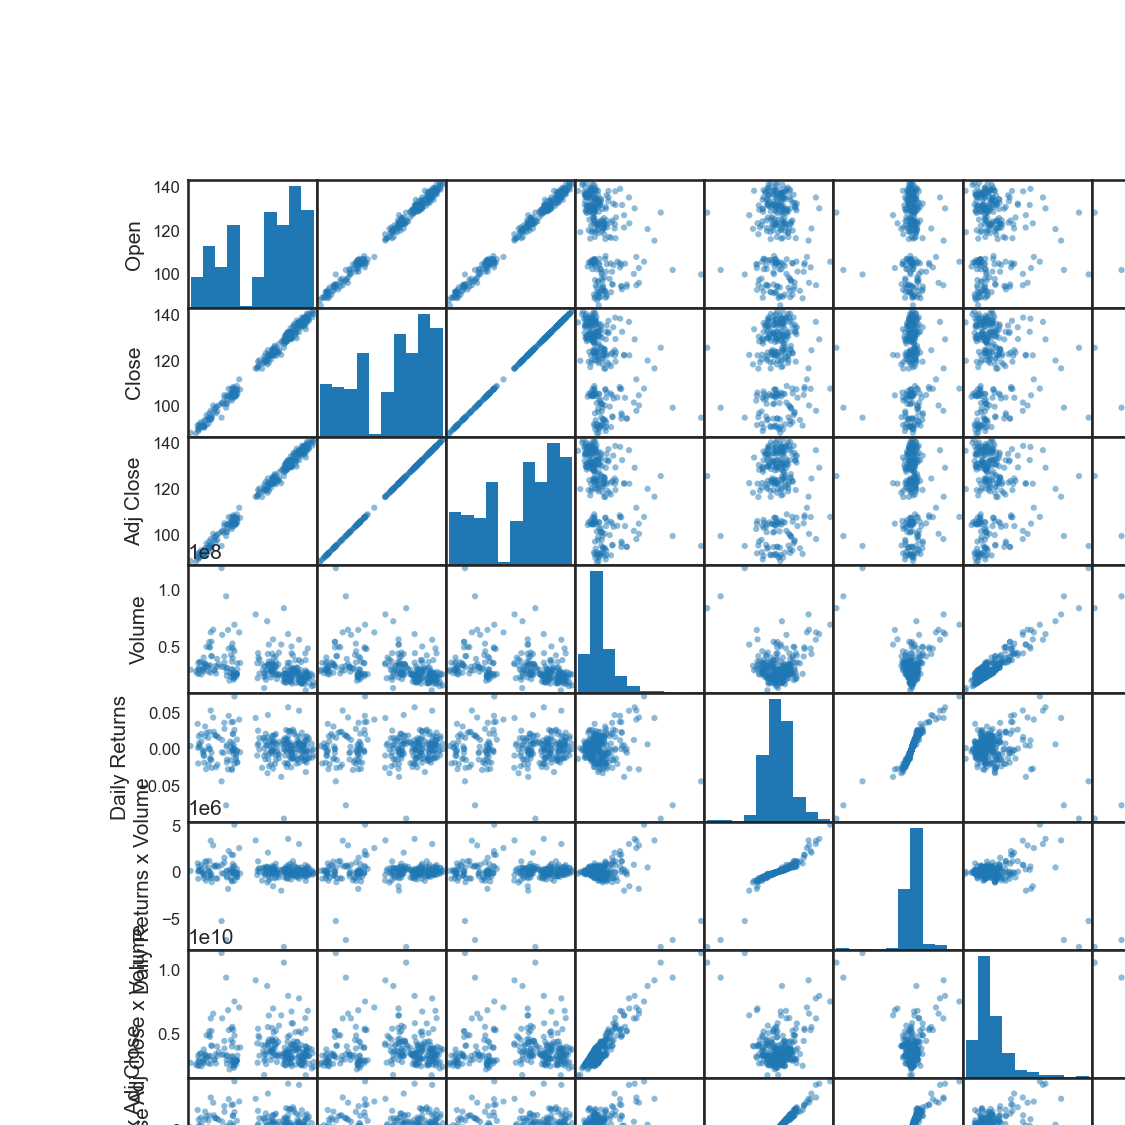

In [25]:
from pandas.plotting import scatter_matrix

attributes = ['Open','Close', 'Adj Close', 'Volume', 'Daily Returns', 
              'Daily Returns x Volume', 'Adj Close x Volume', 
              'Daily Returns x Adj Close', 'Daily Returns x Volume x Adj Close']

scatter_matrix(data_frames['GOOGL'][attributes], figsize=(10, 10));

In [26]:
GOOGL_correlations = data_frames['GOOGL'][attributes].dropna().corr()
GOOGL_correlations

,Open,Close,Adj Close,Volume,Daily Returns,Daily Returns x Volume,Adj Close x Volume,Daily Returns x Adj Close,Daily Returns x Volume x Adj Close
Open,1.000000,0.994690,0.994690,-0.341763,-0.059953,-0.037491,-0.015967,-0.046502,-0.032409
Close,0.994690,1.000000,1.000000,-0.349346,0.017785,0.023605,-0.021789,0.031356,0.028554
Adj Close,0.994690,1.000000,1.000000,-0.349346,0.017785,0.023605,-0.021789,0.031356,0.028554
Volume,-0.341763,-0.349346,-0.349346,1.000000,-0.010102,-0.125913,0.935578,-0.002380,-0.105340
Daily Returns,-0.059953,0.017785,0.017785,-0.010102,1.000000,0.908316,0.009286,0.991976,0.913894
Daily Returns x Volume,-0.037491,0.023605,0.023605,-0.125913,0.908316,1.000000,-0.100114,0.888611,0.992740
Adj Close x Volume,-0.015967,-0.021789,-0.021789,0.935578,0.009286,-0.100114,1.000000,0.020953,-0.080149
Daily Returns x Adj Close,-0.046502,0.031356,0.031356,-0.002380,0.991976,0.888611,0.020953,1.000000,0.907633
Daily Returns x Volume x Adj Close,-0.032409,0.028554,0.028554,-0.105340,0.913894,0.992740,-0.080149,0.907633,1.000000


<IPython.core.display.Javascript object>


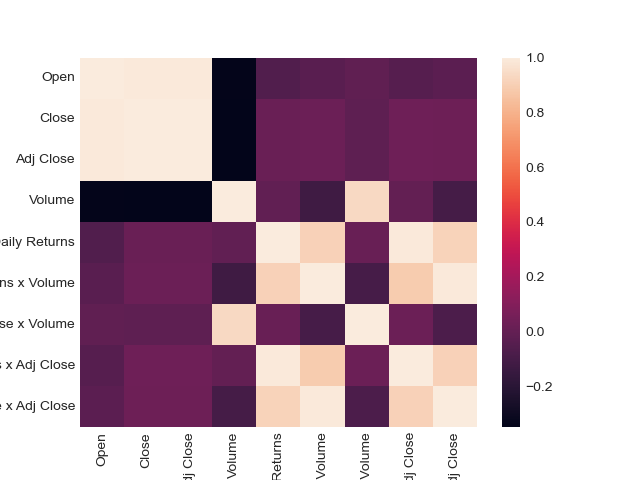

<IPython.core.display.Javascript object>


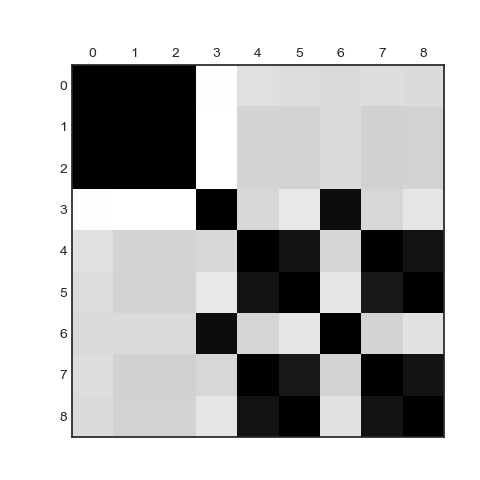

In [36]:
plt.figure()
correlations = GOOGL_correlations
sns.heatmap(correlations, 
            xticklabels=correlations.columns.values,
            yticklabels=correlations.columns.values)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

plt.matshow(correlations)

<IPython.core.display.Javascript object>


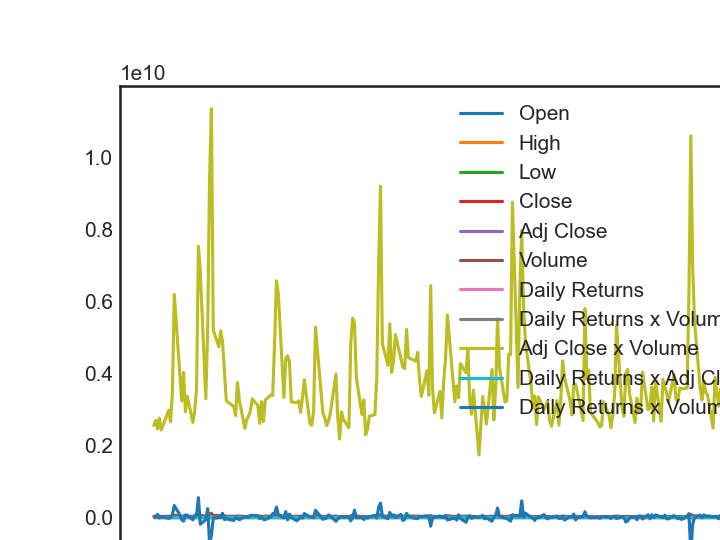

<Axes: xlabel='Date'>

In [27]:
data_frames['GOOGL'].plot()

<IPython.core.display.Javascript object>


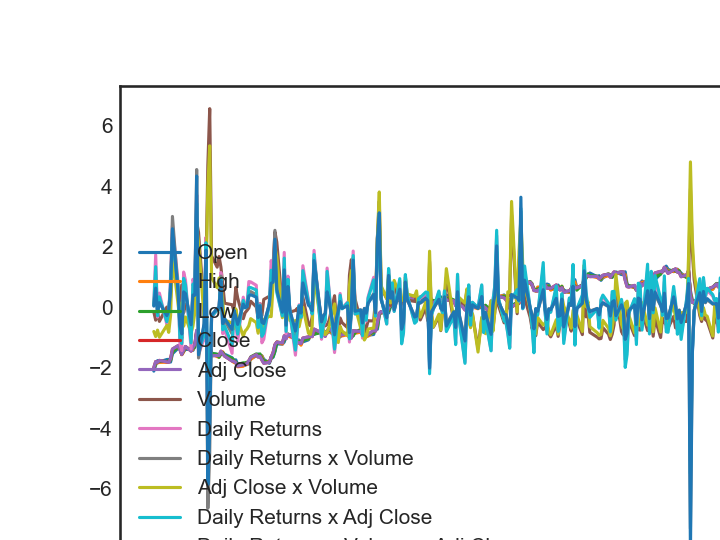

<Axes: xlabel='Date'>

In [28]:
G.plot()

### Correlations for Daily Returns

### Exploring the Close, Adjusted Close and Volume

In [29]:
data_frames['AAPL']['Volume'].max()

154357300

<IPython.core.display.Javascript object>


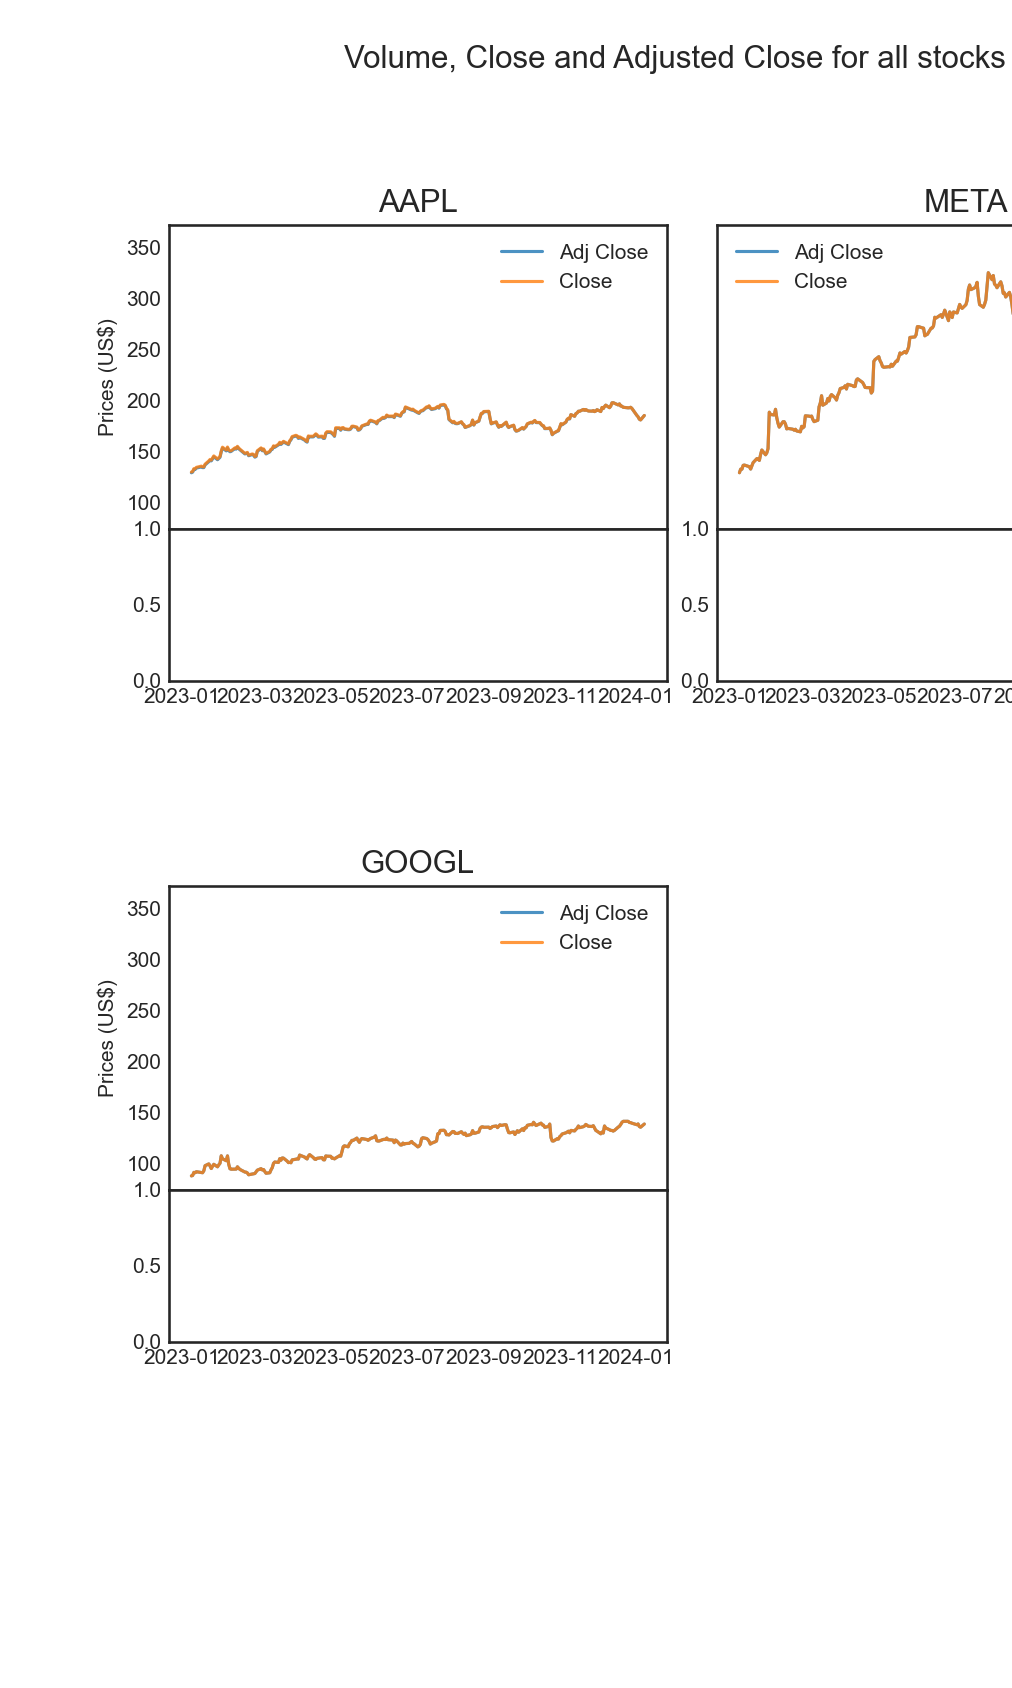

In [30]:
def plt_vol_close_adj_close():
    
    import matplotlib
    import matplotlib.gridspec as gridspec

    def make_ticklabels_invisible(fig):
        for i, ax in enumerate(fig.axes):
            ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
            if i%2 == 0:
                for tl in ax.get_xticklabels():
                    tl.set_visible(False)

    # gridspec inside gridspec

    f = plt.figure(figsize=(9,15))

    gs0 = gridspec.GridSpec(3, 2)
    gs0.update(hspace=0.45, wspace=0.1)

    subplots = []
    ax1 = None
    ax2 = None
    
    for i, ticker in enumerate(stock_tickers):
        gs00 = gridspec.GridSpecFromSubplotSpec(3, 3, subplot_spec=gs0[i], hspace=0)

        # ax1 = plt.Subplot(f, gs00[:-1, :])
        
        if len(subplots) == 0:
            ax1 = plt.Subplot(f, gs00[:-1, :])
            subplots.append(ax1)
            f.add_subplot(ax1)
        else:
            ax_1 = plt.Subplot(f, gs00[:-1, :], sharey=ax1, sharex=ax1)
            f.add_subplot(ax_1)
            print

        
        plt.plot(data_frames[ticker]['Adj Close'], alpha=0.8, label = 'Adj Close')
        plt.plot(data_frames[ticker]['Close'], alpha=0.8, label='Close')
        if i%2 == 0:
            plt.ylabel('Prices (US$)', fontsize=10)
        else:
            plt.setp(ax_1.get_yticklabels(), visible=False)

            
        plt.legend(loc = "best")
        plt.title(ticker, fontsize=15)
        
        if ax2 == None:
            ax2 = plt.Subplot(f, gs00[-1, :], sharex = ax1)
            f.add_subplot(ax2)
            ax2.get_yaxis().get_major_formatter().set_scientific(False)

        else:
            ax_2 = plt.Subplot(f, gs00[-1, :], sharey = ax2, sharex = ax1)
            f.add_subplot(ax_2)
            ax_2.get_yaxis().get_major_formatter().set_scientific(False)

    f.subplots_adjust(top=0.9) 


    plt.suptitle("Volume, Close and Adjusted Close for all stocks", fontsize=15)
    make_ticklabels_invisible(plt.gcf())

    plt.show()
    
plt_vol_close_adj_close()

#### Statistics with Box Plot for Adjusted Close

<IPython.core.display.Javascript object>


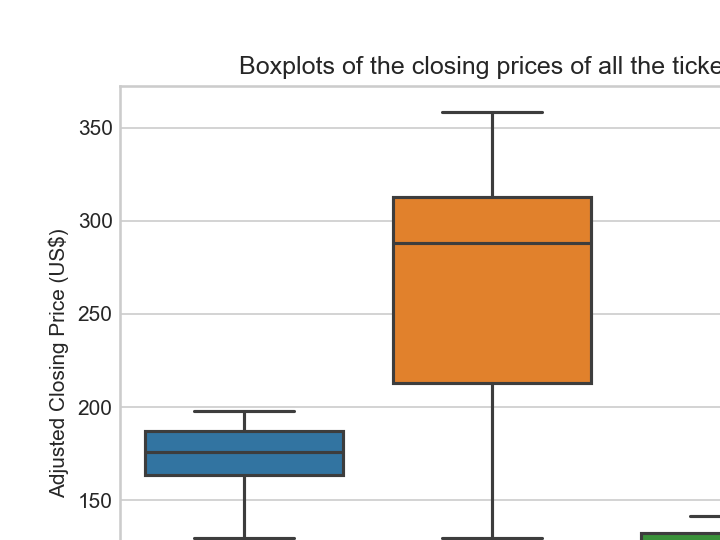

In [31]:

def box_plots_all():
    sns.set_style("whitegrid")
    plt.figure()

    adj_closes = []
    
    for ticker in stock_tickers:
        adj_closes.append(data_frames[ticker]['Adj Close'])
    
    #plt.boxplot(adj_closes) #, whis = 'range'
    sns.boxplot(data=adj_closes);
    
    arr = np.arange(0, len(stock_tickers))
    
    # these need to go under the plt.boxplot
    plt.xticks(arr, stock_tickers)
    plt.title("Boxplots of the closing prices of all the tickers")
    plt.xlabel('Ticker')
    plt.ylabel('Adjusted Closing Price (US$)')
    
box_plots_all()